## Hands on Practise of using Pycaret Library in Python

### What is PyCaret?

PyCaret is an open source low-code machine learning library in Python that aims to reduce the hypothesis to insights cycle time in a ML experiment. It enables data scientists to perform end-to-end experiments quickly and efficiently. In comparison with the other open source machine learning libraries, PyCaret is an alternative low-code library that can be used to perform complex machine learning tasks with only few lines of code. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, Microsoft LightGBM, spaCy and many more.

This notebooks provides you a hands on knowledge like how to Pycaret 2.0 using Gold.csv (in build dataset)

In [1]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import pycaret

In [2]:
#importing gold dataset from pycaret get_data()

from pycaret.datasets import get_data
dataset = get_data('gold')

,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,MSCI EM_T-22,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22
0,0.000000,0.000879,0.001050,0.013158,0.013562,0.003163,-0.007879,-0.004945,-0.003486,-0.024706,...,-0.009862,0.073090,-0.028816,-0.001613,-0.012274,-0.025210,0.024300,0.082695,0.053534,0.004648
1,-0.004587,0.004096,0.002383,0.043599,0.041035,0.040991,0.042356,0.039759,0.029667,0.047906,...,0.006801,0.099088,-0.043704,0.007670,0.018151,0.060624,0.068595,0.151468,0.085822,-0.002105
2,-0.003465,-0.002040,0.000856,0.020444,0.017995,0.003462,0.006222,0.006541,0.007172,0.005262,...,0.014873,0.102887,-0.051438,0.007525,0.028712,0.056289,0.083520,0.134763,0.083915,-0.037438
3,-0.004624,0.000584,-0.002090,-0.015679,-0.012626,0.021992,0.003029,0.004249,0.002498,0.020775,...,0.004931,0.087208,-0.054678,0.005445,0.001445,0.041620,0.061601,0.109940,0.076738,-0.028097
4,-0.009292,-0.000486,0.001047,-0.003540,-0.002558,-0.012658,-0.024912,-0.022026,-0.023551,-0.025000,...,-0.003838,0.076564,-0.076171,-0.009558,-0.003904,0.058352,0.069414,0.094311,0.084487,-0.045466


In [3]:
#to find the shape of the dataset

dataset.shape

(2558, 121)

In [5]:
#to find the columns of the dataset

dataset.columns

Index(['3M Libor_T-1', 'EM Bond_T-1', 'US Bond ETF_T-1', 'Wheat 1_T-1',
       'Wheat 2_T-1', 'Crude Palm Oil_T-1', 'Brent 1_T-1', 'Brent 2_T-1',
       'Light Crude_T-1', 'White Sugar_T-1',
       ...
       'MSCI EM_T-22', 'Shanghai Index_T-22', 'Nikkei Ind_T-22',
       'MSCI APAC ex J_T-22', 'EMEquity ETF_T-22', 'Silver_T-22',
       'Platinum_T-22', 'Palladium_T-22', 'Gold_T-22', 'Gold_T+22'],
      dtype='object', length=121)

In [6]:
#verify whether the dataset contains any null values

dataset.isnull().sum()

3M Libor_T-1       0
EM Bond_T-1        0
US Bond ETF_T-1    0
Wheat 1_T-1        0
Wheat 2_T-1        0
                  ..
Silver_T-22        0
Platinum_T-22      0
Palladium_T-22     0
Gold_T-22          0
Gold_T+22          0
Length: 121, dtype: int64

In [7]:
#Train test split 

data = dataset.sample(frac=0.8, random_state=42).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2046, 121)
Unseen Data For Predictions: (512, 121)


### Initialize Setup

Before execute any of the commands in pycaret, first needs to initialize the setup by using setup() in pycaret

In [4]:
#importing the pycaret

from pycaret.regression import *

In [8]:
#Initialize the setup

reg = setup(data = data, target = 'Gold_T+22', session_id=1)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(2046, 121)"
4,Missing Values,False
5,Numeric Features,120
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [9]:
#Before choosing any of the models as we are not sure which will be the best models, so we have to use compare_models() in pycaret.

compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,K Neighbors Regressor,0.0166,0.0006,0.0234,0.7342,0.0201,0.3991,0.0438
1,Extra Trees Regressor,0.0196,0.0007,0.0260,0.6774,0.0236,0.5767,1.6281
2,CatBoost Regressor,0.0196,0.0007,0.0260,0.6755,0.0230,0.7250,31.0544
3,Light Gradient Boosting Machine,0.0205,0.0007,0.0271,0.6470,0.0233,0.6638,1.5566
4,Random Forest,0.0228,0.0009,0.0299,0.5713,0.0270,0.8416,4.6344
5,Extreme Gradient Boosting,0.0225,0.0009,0.0299,0.5697,0.0252,0.9848,1.1950
6,Gradient Boosting Regressor,0.0263,0.0012,0.0338,0.4533,0.0294,-0.3321,4.4386
7,AdaBoost Regressor,0.0323,0.0016,0.0396,0.2430,0.0337,-0.3812,1.5655
8,Bayesian Ridge,0.0337,0.0019,0.0435,0.0956,0.0365,-0.2572,0.0266
9,Ridge Regression,0.0338,0.0019,0.0438,0.0849,0.0377,0.0172,0.0114


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [10]:
#For Building a model, create_model() using the selected algorithm and here creating model using knn

knn_model = create_model("knn")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0160,0.0005,0.0219,0.6795,0.0172,-0.2425
1,0.0170,0.0006,0.0250,0.6820,0.0215,0.1235
2,0.0189,0.0008,0.0278,0.7220,0.0234,0.0118
3,0.0181,0.0006,0.0248,0.7668,0.0223,-0.0024
4,0.0150,0.0004,0.0205,0.7655,0.0178,-0.2020
5,0.0166,0.0005,0.0219,0.7935,0.0203,0.1041
6,0.0173,0.0006,0.0253,0.6971,0.0226,-1.1507
7,0.0147,0.0004,0.0205,0.7986,0.0169,-0.0586
8,0.0172,0.0006,0.0235,0.7528,0.0195,1.7294
9,0.0156,0.0005,0.0227,0.6839,0.0197,3.6785


In [11]:
#creating model using adaboost

ada_model = create_model("ada")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0274,0.0011,0.0337,0.2410,0.0276,-0.1442
1,0.0326,0.0015,0.0393,0.2160,0.0324,-0.0977
2,0.0337,0.0018,0.0425,0.3489,0.0382,-0.8724
3,0.0363,0.0018,0.0427,0.3107,0.0366,-0.6165
4,0.0314,0.0015,0.0387,0.1637,0.0320,-0.3060
5,0.0341,0.0018,0.0421,0.2404,0.0367,-0.0141
6,0.0325,0.0016,0.0402,0.2350,0.0330,-2.6151
7,0.0325,0.0016,0.0404,0.2197,0.0361,0.0170
8,0.0329,0.0016,0.0406,0.2635,0.0339,0.5447
9,0.0291,0.0013,0.0364,0.1915,0.0308,0.2917


In [12]:
#Tuning the trained model 

tune_knn = tune_model(knn_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0119,0.0003,0.0160,0.8286,0.0133,-0.5737
1,0.0131,0.0004,0.0188,0.8210,0.0157,0.2368
2,0.0117,0.0002,0.0156,0.9120,0.0125,-0.2604
3,0.0120,0.0003,0.0168,0.8935,0.0140,0.0085
4,0.0109,0.0002,0.0157,0.8628,0.0131,-0.1620
5,0.0113,0.0003,0.0160,0.8903,0.0130,0.4467
6,0.0117,0.0002,0.0151,0.8915,0.0129,-1.1594
7,0.0116,0.0003,0.0170,0.8619,0.0146,0.8937
8,0.0126,0.0003,0.0177,0.8596,0.0147,1.4323
9,0.0124,0.0003,0.0184,0.7929,0.0131,20.0551


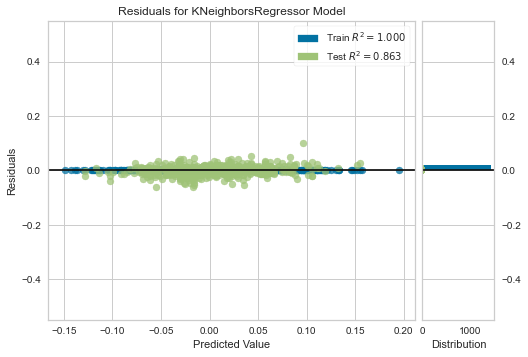

In [13]:
#Visually understand the tuned model

plot_model(tune_knn)

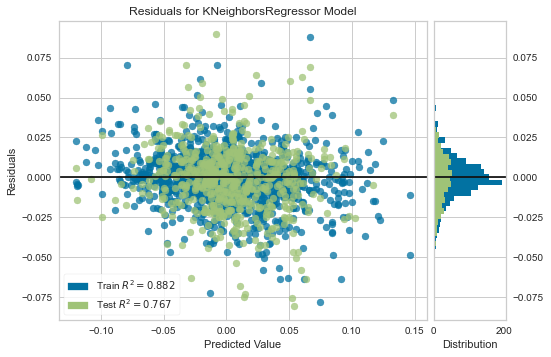

In [14]:
#pictorial representation of knn model before tuning

plot_model(knn_model)

In [22]:
#To evaluate the tuned model

evaluate_model(tune_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [23]:
#Predictions made using tuned model

predict_model(tune_knn);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.0114,0.0003,0.0159,0.863,0.0132,1.3339


In [24]:
#finalizing the model

final_knn = finalize_model(tune_knn)

In [25]:
print(final_knn)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=50, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
                    weights='uniform')


In [26]:
#predicting the final_knn

predict_model(final_knn)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,K Neighbors Regressor,0.0,0.0,0.0,1.0,0.0,0.0


,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22,Label
0,-0.010801,0.001853,0.001620,-0.022761,-0.022254,-0.006237,-0.015881,-0.014410,-0.016576,0.001921,...,0.003812,0.003506,0.031642,0.027182,0.088637,0.061914,0.031081,0.074230,0.033887,0.0339
1,0.002132,0.001255,0.000370,0.012411,0.010832,-0.002775,0.023612,0.023583,0.020510,0.004340,...,-0.004555,-0.015767,0.046120,0.055958,0.071438,0.067330,0.194677,0.069073,0.021777,0.0218
2,0.006084,0.001518,0.000188,0.002000,-0.001972,-0.004815,-0.000458,-0.000613,-0.003684,-0.000545,...,-0.049808,-0.079777,-0.040032,-0.008155,0.008256,-0.017434,-0.058644,0.000855,-0.005929,-0.0059
3,0.002474,-0.002381,-0.000385,-0.022222,-0.021611,-0.005695,0.015619,0.012663,0.012346,-0.010370,...,-0.070450,-0.039871,-0.069249,-0.071963,-0.136145,-0.069060,-0.061356,-0.012481,-0.019315,-0.0193
4,-0.007043,0.000000,0.004641,-0.017996,-0.019166,0.006436,-0.032708,-0.052906,-0.053935,0.017609,...,-0.058357,-0.074467,-0.075896,-0.066284,-0.007155,-0.083912,-0.020333,0.022639,0.086531,0.0865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000070,0.000600,-0.000642,-0.005767,-0.006169,-0.007843,-0.003967,-0.004593,-0.004368,-0.003266,...,0.029686,0.069328,0.080751,0.085027,0.078792,0.075080,0.097353,0.044269,0.003879,0.0039
610,0.001478,0.002347,0.001732,-0.011341,-0.011781,-0.003434,-0.027394,-0.022833,-0.024931,-0.003540,...,0.025908,-0.001939,0.045440,0.062333,0.002069,0.010828,-0.048423,0.006701,0.023860,0.0239
611,-0.001801,-0.001327,0.000000,0.012968,0.012169,-0.006522,-0.001596,0.008156,0.016416,-0.027323,...,-0.036673,0.052583,-0.026036,-0.025018,-0.186565,-0.090995,-0.121271,-0.140749,0.013087,0.0131
612,-0.004478,0.003560,0.001692,0.014739,0.015368,0.027185,-0.006376,-0.006345,-0.008174,0.008788,...,-0.039132,-0.026895,0.049035,0.048839,0.068337,0.018375,0.035404,0.044608,0.021876,0.0219


In [27]:
#predicting the unseen (test data) using the final_knn

unseen_predictions = predict_model(final_knn, data=data_unseen)
unseen_predictions.head()

,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22,Label
0,0.000838,-0.001965,-0.000455,-0.012270,-0.008030,0.004613,-0.000721,-0.002530,-0.000199,0.006952,...,0.028891,0.010500,0.034843,0.056582,0.012830,-0.013368,0.010259,0.014772,-0.019791,-0.0198
1,0.000838,-0.001455,-0.000546,0.002259,0.002159,-0.016955,-0.000722,-0.000725,-0.001589,-0.029474,...,0.026959,0.042576,0.038073,0.049920,0.022855,-0.027692,-0.016243,0.021089,-0.016611,-0.0159
2,-0.002300,-0.006429,-0.000820,0.017465,0.015078,0.001437,0.014079,0.012149,0.008950,0.014774,...,0.024062,0.047302,0.039099,0.041296,0.009191,-0.037340,-0.030884,0.007879,-0.015888,-0.0159
3,0.003983,0.002847,-0.000182,0.002769,0.001061,-0.014352,0.004806,0.005016,0.007294,0.000270,...,0.020542,0.049714,0.024940,0.029783,-0.000884,-0.040021,-0.023592,0.005201,-0.007227,-0.0159
4,0.000836,0.001721,0.000729,-0.006626,-0.004769,0.000000,0.007972,0.005704,-0.001370,-0.007817,...,0.019717,0.044344,0.020058,0.019088,-0.003703,-0.046619,-0.017685,0.005660,-0.015922,-0.0159


In [28]:
unseen_predictions

,3M Libor_T-1,EM Bond_T-1,US Bond ETF_T-1,Wheat 1_T-1,Wheat 2_T-1,Crude Palm Oil_T-1,Brent 1_T-1,Brent 2_T-1,Light Crude_T-1,White Sugar_T-1,...,Shanghai Index_T-22,Nikkei Ind_T-22,MSCI APAC ex J_T-22,EMEquity ETF_T-22,Silver_T-22,Platinum_T-22,Palladium_T-22,Gold_T-22,Gold_T+22,Label
0,0.000838,-0.001965,-0.000455,-0.012270,-0.008030,0.004613,-0.000721,-0.002530,-0.000199,0.006952,...,0.028891,0.010500,0.034843,0.056582,0.012830,-0.013368,0.010259,0.014772,-0.019791,-0.0198
1,0.000838,-0.001455,-0.000546,0.002259,0.002159,-0.016955,-0.000722,-0.000725,-0.001589,-0.029474,...,0.026959,0.042576,0.038073,0.049920,0.022855,-0.027692,-0.016243,0.021089,-0.016611,-0.0159
2,-0.002300,-0.006429,-0.000820,0.017465,0.015078,0.001437,0.014079,0.012149,0.008950,0.014774,...,0.024062,0.047302,0.039099,0.041296,0.009191,-0.037340,-0.030884,0.007879,-0.015888,-0.0159
3,0.003983,0.002847,-0.000182,0.002769,0.001061,-0.014352,0.004806,0.005016,0.007294,0.000270,...,0.020542,0.049714,0.024940,0.029783,-0.000884,-0.040021,-0.023592,0.005201,-0.007227,-0.0159
4,0.000836,0.001721,0.000729,-0.006626,-0.004769,0.000000,0.007972,0.005704,-0.001370,-0.007817,...,0.019717,0.044344,0.020058,0.019088,-0.003703,-0.046619,-0.017685,0.005660,-0.015922,-0.0159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.003188,0.001138,0.000088,-0.002636,-0.004186,0.003653,0.006328,0.004195,0.003423,0.005877,...,-0.016066,-0.052616,-0.068614,-0.074613,0.113947,0.023891,-0.054390,0.078584,-0.027450,-0.0274
508,0.003587,0.002273,-0.000613,-0.006342,-0.006306,-0.021838,0.009432,0.008857,0.011672,-0.010062,...,-0.020804,-0.057504,-0.065403,-0.056987,0.100452,0.058116,-0.026405,0.067664,-0.036271,-0.0363
509,0.002758,0.003315,0.000877,-0.042553,-0.024326,0.000465,-0.009344,-0.019546,-0.025027,-0.012131,...,-0.015778,-0.037969,-0.047156,-0.037826,0.128883,0.082897,0.009726,0.075201,-0.027154,-0.0272
510,-0.002283,0.000000,0.000000,0.000000,0.000000,0.000000,-0.030117,-0.022977,0.000000,0.013940,...,0.005274,-0.042746,-0.038685,-0.018559,0.130168,0.095757,0.075147,0.059018,-0.020309,-0.0203
